# Io Composite Data
The Hubble Space Telescope (HST) spectroscopic abilities provides us ultraviolet data with its Cosmic Origins Spectrograph (COS). I will begin this project by plotting the composite data of Io's two eclipsed exposures and overplotting the 90+ features we want to explore. First, we must open the .fits file and take the flux and wavelength columns from the composite data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.table import Table
#%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
hdulist = fits.open('../data/composite_Io_eclipsed.fits') #have to link whole address

In [3]:
print(os.getcwd()) #check to make sure in what directory

C:\Users\jojoa\GitHub\io_brightness\notebooks


In [4]:
hdulist

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000018C9A03CC08>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000018C9A060A88>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000018C9A07CAC8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000018C9A08E6C8>]

In [5]:
hdulist.info()

Filename: ../data/composite_Io_eclipsed.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     21   1R x 2C   [36739D, 36739D]   
  2  SCI           1 BinTableHDU    342   1R x 2C   [36739D, 36739D]   
  3  SCI           1 BinTableHDU    342   1R x 2C   [36739D, 36739D]   


In [6]:
hdu = hdulist[0] #primary hdu

In [7]:
hdu.header

SIMPLE  =                    T /Dummy Created by MWRFITS v1.11b                 
BITPIX  =                    8 /Dummy primary header created by MWRFITS         
NAXIS   =                    0 /No data is associated with this header          
EXTEND  =                    T /Extensions may (will!) be present               

In [8]:
hdu = hdulist[1] #composite

In [9]:
hdu.header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11b          
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =               587824 /Number of bytes per row                         
NAXIS2  =                    1 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                    2 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [10]:
events = Table.read(hdulist, hdu=1)

In [11]:
print(events.columns)

<TableColumns names=('FLUX','WAVELENGTH')>


In [12]:
print(events['FLUX'].unit)
print(events['WAVELENGTH'].unit)

None
None


In [13]:
print(events['FLUX'])

FLUX [36739]
------------
  0.0 .. 0.0


In [14]:
print(events['WAVELENGTH'])

           WAVELENGTH [36739]           
----------------------------------------
1124.5707011882266 .. 1479.5615197001903


In [15]:
len(events['WAVELENGTH'])

1

In [16]:
evt_data = Table(hdulist[1].data)

In [17]:
evt_data

FLUX [36739],WAVELENGTH [36739]
float64,float64
0.0 .. 0.0,1124.5707011882266 .. 1479.5615197001903


In [18]:
image_data = hdulist[1].data

In [19]:
print(type(evt_data))
print(image_data.shape)

<class 'astropy.table.table.Table'>
(1,)


# Plotting the spectrum given by COS and examining its features
The wavelength of this spectrum ranges from 1125 Angstroms to 1480 Angstroms. This range includes species from O I all the way to S I. I can also zoom in to specific features to see the instensity.

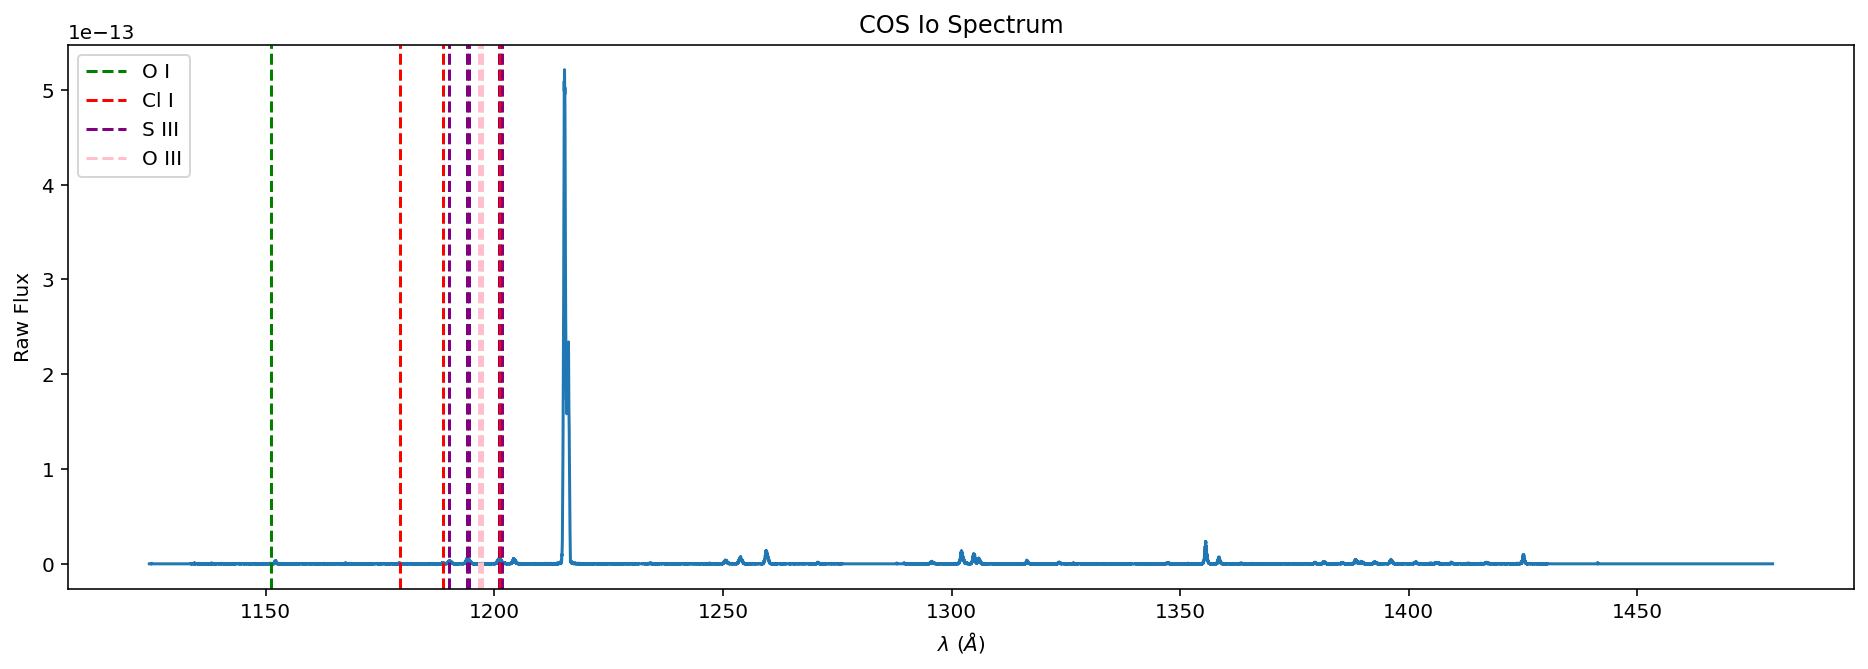

In [20]:
plt.figure(figsize=(16, 5))
plt.plot(evt_data['WAVELENGTH'].T, evt_data['FLUX'].T) #make it columns instead of rows bc otherwise will be a blank plot
plt.xlabel('$\lambda$ ($\AA$)');
plt.ylabel('Raw Flux')
plt.title("COS Io Spectrum")
plt.axvline(1151.151,linestyle='dashed',color='green',label="O I")
plt.axvline(1179.293,linestyle='dashed',color='red',label="Cl I")
plt.axvline(1188.774,linestyle='dashed',color='red')
plt.axvline(1190.206,linestyle='dashed',color='purple',label="S III")
plt.axvline(1194.061,linestyle='dashed',color='purple')
plt.axvline(1194.457,linestyle='dashed',color='purple')
plt.axvline(1196.753,linestyle='dashed',color='pink',label="O III")
plt.axvline(1197.239,linestyle='dashed',color='pink')
plt.axvline(1197.331,linestyle='dashed',color='pink')
plt.axvline(1200.970,linestyle='dashed',color='purple')
plt.axvline(1201.353,linestyle='dashed',color='red')
plt.axvline(1201.730,linestyle='dashed',color='purple')
plt.legend(loc="upper left")
plt.show()

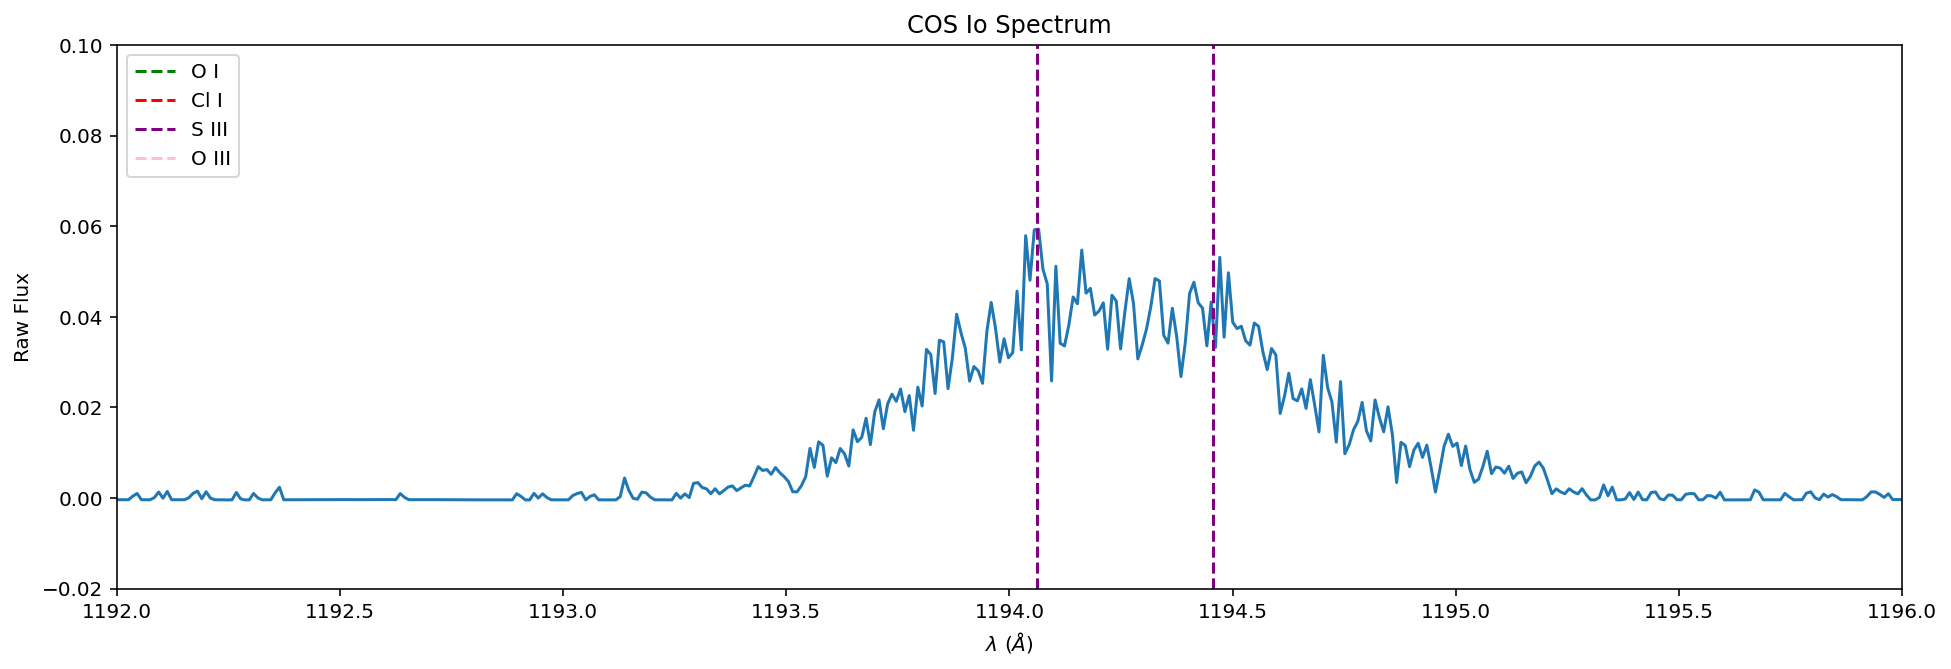

In [21]:
plt.figure(figsize=(16, 5))
plt.plot(evt_data['WAVELENGTH'].T, evt_data['FLUX'].T/10**-13) #make it columns instead of rows bc otherwise will be a blank plot, easier for y lim when dividing
plt.xlabel('$\lambda$ ($\AA$)');
plt.ylabel('Raw Flux')
plt.title("COS Io Spectrum")
plt.axvline(1151.151,linestyle='dashed',color='green',label="O I")
plt.axvline(1179.293,linestyle='dashed',color='red',label="Cl I")
plt.axvline(1188.774,linestyle='dashed',color='red')
plt.axvline(1190.206,linestyle='dashed',color='purple',label="S III")
plt.axvline(1194.061,linestyle='dashed',color='purple')
plt.axvline(1194.457,linestyle='dashed',color='purple')
plt.axvline(1196.753,linestyle='dashed',color='pink',label="O III")
plt.axvline(1197.239,linestyle='dashed',color='pink')
plt.axvline(1197.331,linestyle='dashed',color='pink')
plt.legend(loc="upper left")
plt.xlim(1192,1196)
plt.ylim(-0.02,.1)
plt.show()

# Creating the Io Master Line Array
From the excel file with the 90+ features, we will create a python array using pandas to easily mark which portions of the spectrum we want to identify.

In [22]:
df = pd.read_csv('../data/Io_Master_Line_List (1).csv') #spaces in csv file will make df object type and not float64

In [23]:
df

,Wavelength,Species,Brightness,Blended?,Lifetime,Notes,Unnamed: 6,Unnamed: 7,Lower State,Upper State
0,1152.151,O I,NaN,No,5.28E+08,"Optically thick, strongly self absorbed",NaN,NaN,NaN,NaN
1,1179.293,Cl I,NaN,No,?,faint C III multiplet at 1176A deserves a clos...,NaN,NaN,NaN,NaN
2,1188.774,Cl I,NaN,Red-Side,2.33E+08,NaN,NaN,NaN,NaN,NaN
3,1190.206,S III,NaN,Blue Side,4.05E+07,NaN,NaN,NaN,NaN,NaN
4,1194.061,S III,NaN,Yes / w Self,5.38E+07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
87,1425.219,S I,NaN,Yes w/ Self,1.05E+07,NaN,NaN,NaN,NaN,NaN
88,1433.280,S I,NaN,Yes w/ Self,2.81E+08,NaN,NaN,NaN,NaN,NaN
89,1433.311,S I,NaN,Yes w/ Self,1.56E+08,NaN,NaN,NaN,NaN,NaN
90,1436.968,S I,NaN,No,2.07E+08,NaN,NaN,NaN,NaN,NaN


In [24]:
df.columns

Index(['Wavelength', 'Species', 'Brightness', 'Blended? ', 'Lifetime', 'Notes',
       'Unnamed: 6', 'Unnamed: 7', 'Lower State', 'Upper State'],
      dtype='object')

In [25]:
df.Species.value_counts()

S I      52
S II     10
Cl I     10
O I       6
S III     6
S IV      4
O III     3
un-ID     1
Name: Species, dtype: int64

Let's take the species we want from the dataframe. In this case, we will begin looking at the S I line.

In [26]:
line = "S I"
target_mask = df.Species.str.endswith(line) #probably a better function but idk it right now
df = df[target_mask]

In [27]:
df

,Wavelength,Species,Brightness,Blended?,Lifetime,Notes,Unnamed: 6,Unnamed: 7,Lower State,Upper State
17,1208.8500,S I,NaN,No,?,NaN,NaN,NaN,NaN,NaN
18,1211.2120,S I,NaN,Yes / w Self,?,NaN,NaN,NaN,NaN,NaN
19,1211.3800,S I,NaN,Yes / w Self,?,NaN,NaN,NaN,NaN,NaN
20,1212.7950,S I,NaN,Yes / w Lyα,?,No evalutation of Io's Lyα yet,NaN,NaN,NaN,NaN
21,1218.5950,S I,NaN,Yes / w Lyα,?,No evalutation of Io's Lyα yet,NaN,NaN,NaN,NaN
22,1224.4240,S I,NaN,Yes / w Self,?,NaN,NaN,NaN,NaN,NaN
23,1224.4790,S I,NaN,Yes / w Self,?,NaN,NaN,NaN,NaN,NaN
24,1224.5440,S I,NaN,Yes / w Self,?,NaN,NaN,NaN,NaN,NaN
26,1227.0890,S I,NaN,Yes / w S II,?,Possible S I or S V at ~1230,NaN,NaN,NaN,NaN
28,1233.9220,S I,NaN,Yes / w S II,?,NaN,NaN,NaN,NaN,NaN


In [28]:
df_wavelength = df['Wavelength']
df_species = df['Species']

In [29]:
df_wavelength

17    1208.8500
18    1211.2120
19    1211.3800
20    1212.7950
21    1218.5950
22    1224.4240
23    1224.4790
24    1224.5440
26    1227.0890
28    1233.9220
30    1241.9050
31    1247.1600
32    1248.0450
34    1250.8140
35    1253.2970
36    1253.3250
38    1256.0930
41    1262.8600
42    1269.2090
43    1270.7820
44    1277.1990
45    1277.2120
46    1280.0990
47    1295.6520
48    1296.1740
50    1302.3370
51    1302.8630
52    1303.1110
53    1303.4295
55    1305.8830
57    1310.1940
58    1313.2490
59    1316.5420
60    1316.6180
61    1323.5150
62    1323.5220
63    1326.6430
71    1381.5520
72    1385.5100
73    1388.4350
74    1389.1540
77    1392.5880
78    1396.1120
79    1401.5140
82    1409.3370
83    1412.8730
86    1425.0300
87    1425.2190
88    1433.2800
89    1433.3110
90    1436.9680
91    1448.2290
Name: Wavelength, dtype: float64

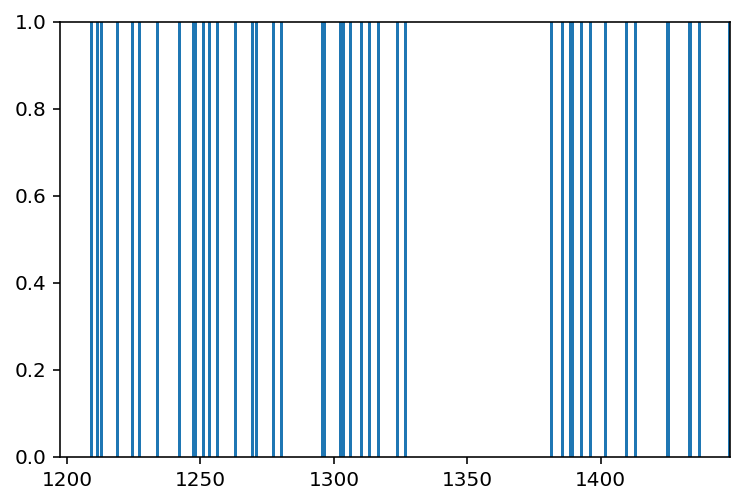

In [30]:
for xc in df_wavelength: #df_wavelength
    plt.axvline(x=xc)
#plt.xlim(1200,1450)

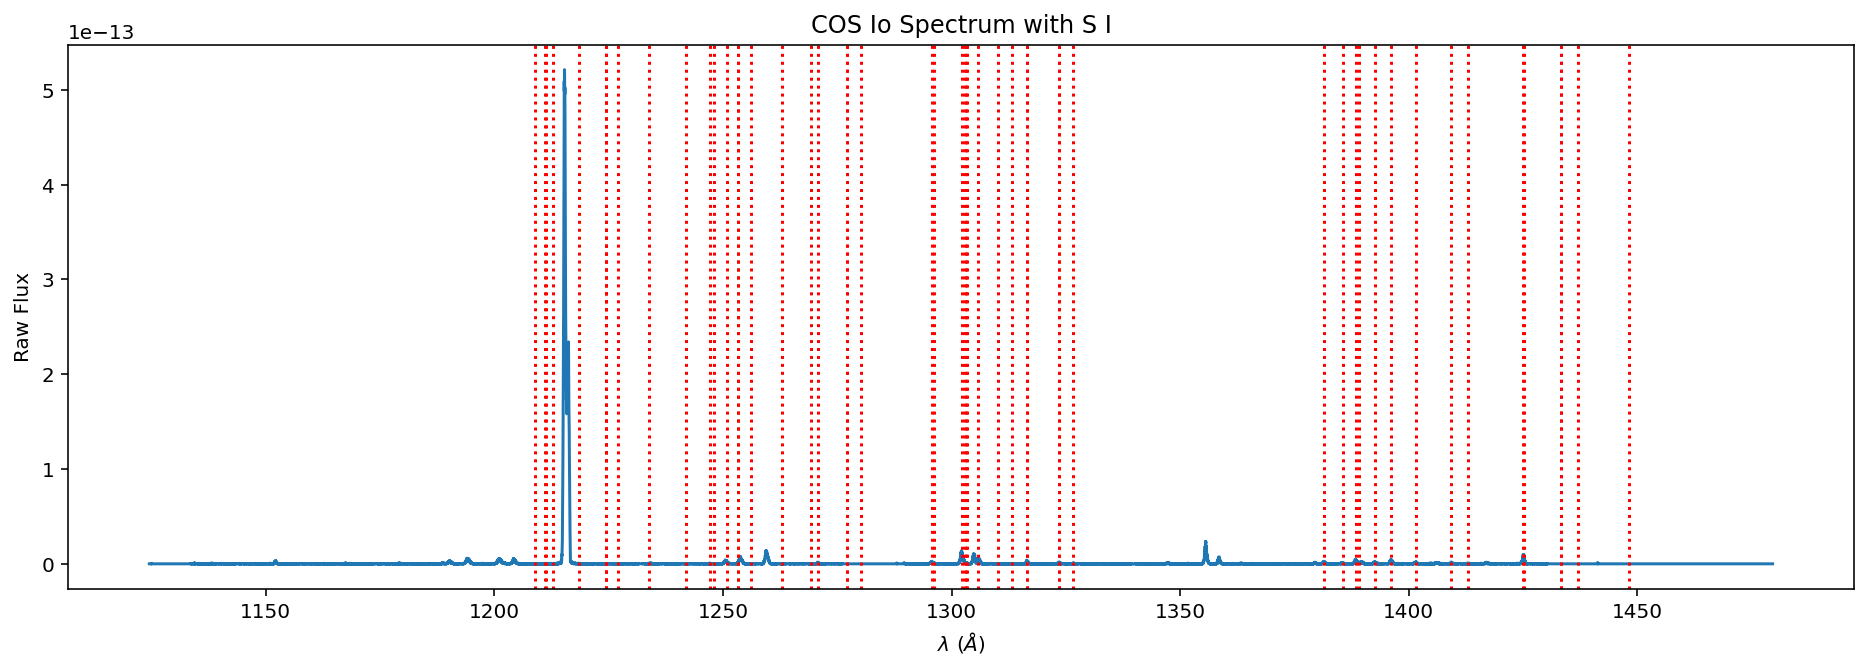

In [31]:
plt.figure(figsize=(16, 5))
plt.plot(evt_data['WAVELENGTH'].T, evt_data['FLUX'].T) #make it columns instead of rows bc otherwise will be a blank plot
plt.xlabel('$\lambda$ ($\AA$)');
plt.ylabel('Raw Flux')
plt.title("COS Io Spectrum with S I")
for xc in df_wavelength:
    plt.axvline(x=xc, color = 'red', linestyle = 'dotted')

# Testing 
I had some trouble with the excel file because some of the numbers for the wavelength have a space after them, making the data type 'object' instead of 'float64'. Thus, we must use a .csv file and open it in text editor to delete all the spaces. 

In [49]:
df = pd.read_csv('../data/trial.csv')
#df = pd.read_excel('data/master_list_2.xlsx', sheet_name='Sheet1')

In [50]:
df

,Wavelength,Species,Unnamed: 2
0,1152.151,O I,NaN
1,1179.293,Cl I,NaN
2,1188.774,Cl I,NaN
3,1190.206,S III,NaN
4,1194.061,S III,NaN
5,1194.457,S III,NaN
6,1197.239,O III,NaN
7,1201.353,Cl I,NaN
8,1203.861,S II,NaN
9,1204.335,S II,NaN


In [51]:
df = df['Wavelength']

In [52]:
df

0     1152.151
1     1179.293
2     1188.774
3     1190.206
4     1194.061
5     1194.457
6     1197.239
7     1201.353
8     1203.861
9     1204.335
10    1204.735
11    1211.212
12    1212.795
13    1224.424
14    1224.479
15    1224.544
Name: Wavelength, dtype: float64

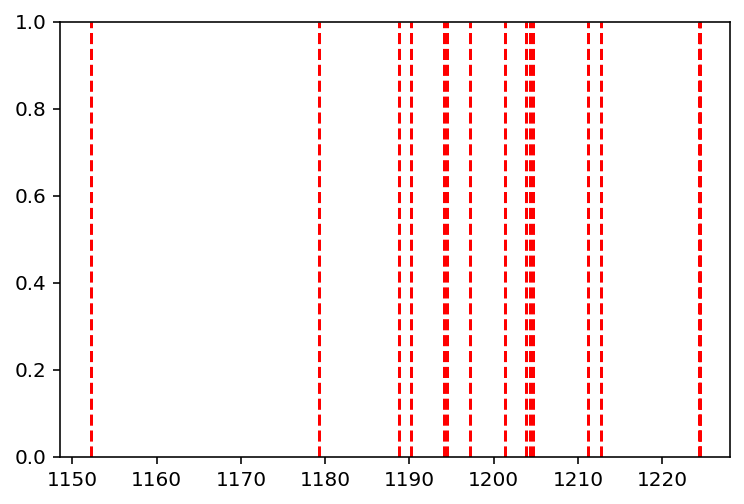

In [53]:
for xc in df:
    plt.axvline(x=xc, color = 'red', linestyle = 'dashed')
#plt.xlim(1100,1500)
#plt.legend(loc="upper left")

In [55]:
df = pd.read_csv('../data/Io_Master_Line_List (1).csv')

In [56]:
df

,Wavelength,Species,Brightness,Blended?,Lifetime,Notes,Unnamed: 6,Unnamed: 7,Lower State,Upper State
0,1152.151,O I,NaN,No,5.28E+08,"Optically thick, strongly self absorbed",NaN,NaN,NaN,NaN
1,1179.293,Cl I,NaN,No,?,faint C III multiplet at 1176A deserves a clos...,NaN,NaN,NaN,NaN
2,1188.774,Cl I,NaN,Red-Side,2.33E+08,NaN,NaN,NaN,NaN,NaN
3,1190.206,S III,NaN,Blue Side,4.05E+07,NaN,NaN,NaN,NaN,NaN
4,1194.061,S III,NaN,Yes / w Self,5.38E+07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
87,1425.219,S I,NaN,Yes w/ Self,1.05E+07,NaN,NaN,NaN,NaN,NaN
88,1433.280,S I,NaN,Yes w/ Self,2.81E+08,NaN,NaN,NaN,NaN,NaN
89,1433.311,S I,NaN,Yes w/ Self,1.56E+08,NaN,NaN,NaN,NaN,NaN
90,1436.968,S I,NaN,No,2.07E+08,NaN,NaN,NaN,NaN,NaN


In [57]:
df = df['Wavelength']

In [58]:
df

0     1152.151
1     1179.293
2     1188.774
3     1190.206
4     1194.061
        ...   
87    1425.219
88    1433.280
89    1433.311
90    1436.968
91    1448.229
Name: Wavelength, Length: 92, dtype: float64

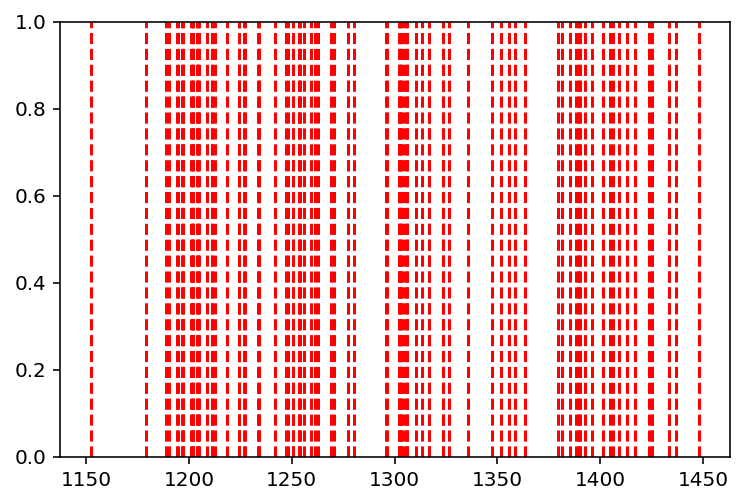

In [59]:
for xc in df:
    plt.axvline(x=xc, color = 'red', linestyle = 'dashed')